In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [9]:
data = pd.read_csv("../files/bank-data.csv", sep=";")
data.drop(data.ix[:,1:10], axis=1, inplace=True)
data.drop("poutcome", axis=1, inplace=True)
n = 300
sample_yes = data.ix[data.y == "yes"].sample(n=n, replace=False)
sample_no = data.ix[data.y == "no"].sample(n=n, replace=False)
df = pd.concat([sample_yes, sample_no])
df = df.sample(frac=1)       # Shuffle the whole set
X = df.drop('y', axis=1)  
y = df.ix[:, 'y']
y.replace("yes", 1, inplace=True)
y.replace("no", 0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier()
 
# the range of number of neighbors you want to test
n_neighbors = np.arange(1, 150, 2)
 
# here you store the models for each dataset used
accuracy_std = list()
accuracy_mean = list()
 
# loop through possible n_neighbors and try them out
for n in n_neighbors:
    knn.n_neighbors = n
    knn.fit(X_train, y_train)
    accuracy_std.append(cross_val_score(knn, X_train, y_train, cv = 30).std())
    accuracy_mean.append(cross_val_score(knn, X_train, y_train, cv = 30).mean())

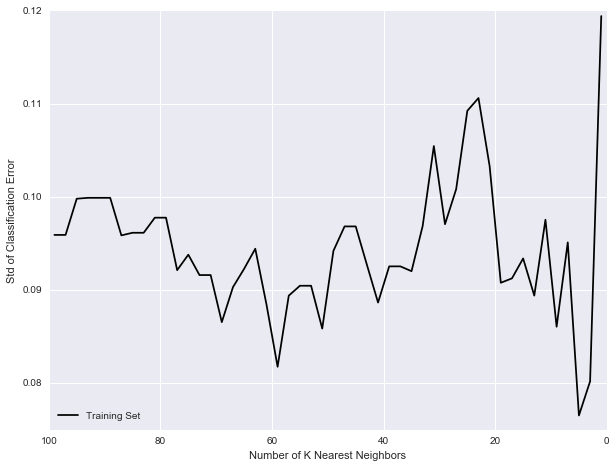

In [7]:
plt.figure(figsize=(10,7.5))
plt.plot(n_neighbors, accuracy_std, c="black", label="Training Set")
plt.xlabel('Number of K Nearest Neighbors')
plt.ylabel('Std of Classification Error')
plt.gca().invert_xaxis()
plt.legend(loc = "lower left")
plt.show()

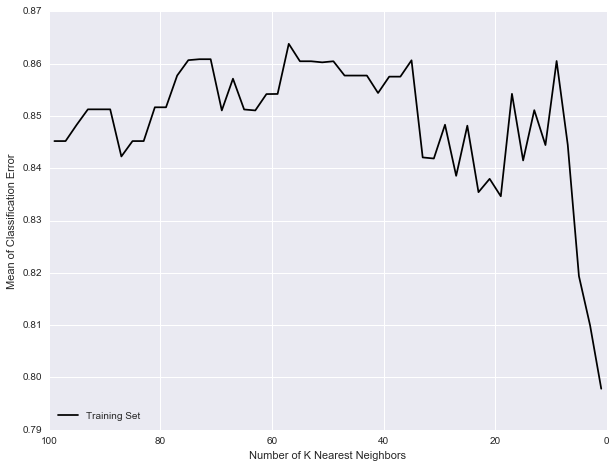

In [8]:
plt.figure(figsize=(10,7.5))
plt.plot(n_neighbors, accuracy_mean, c="black", label="Training Set")
plt.xlabel('Number of K Nearest Neighbors')
plt.ylabel('Mean of Classification Error')
plt.gca().invert_xaxis()
plt.legend(loc = "lower left")
plt.show()